In [19]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
from astropy.table import Table, join
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial import cKDTree

In [34]:
initial_values = Table.read('../spectrum_analysis/galah_dr4_initial_parameters_220714_lite.fits')

In [35]:
grids = Table.read('galah_dr4_model_trainingset_gridpoints.fits')

In [36]:
grids['model_name'] = np.array([str(int(grid['teff_subgrid']))+'_'+str("{:.2f}".format(grid['logg_subgrid']))+'_'+str("{:.2f}".format(grid['fe_h_subgrid'])) for grid in grids])

In [37]:
grid_index_tree = cKDTree(np.c_[grids['teff_subgrid']/1000.,grids['logg_subgrid'],grids['fe_h_subgrid']])

In [38]:
initial_values['grid_index'] = np.array([grid_index_tree.query([tgf[0]/1000.,tgf[1],tgf[2]]) for tgf in np.array([initial_values['teff'],initial_values['logg'],initial_values['fe_h']]).T])[:,1]

In [39]:
indices = initial_values['grid_index']
priority = Table()
d,c = np.unique(indices, return_counts=True)
priority['index_subgrid'] = np.array(d,dtype=int)
priority['counts_dr4_init'] = np.array(c,dtype=int)
priority = join(priority, grids, keys='index_subgrid')
priority.sort(keys='counts_dr4_init',reverse=True)

In [76]:
def test_grid_index_computations(test_grid_index = 1931, print_all_points=False,):
    if print_all_points:
        print('Printing grid points not yet computed for '+str(grids['model_name'][test_grid_index])+':')

    # Find upper and lower Teff points
    test_grid_teff = int(grids['teff_subgrid'][test_grid_index])
    if test_grid_teff <= 4000:
        test_grid_teff_lower = test_grid_teff - 100
    else:
        test_grid_teff_lower = test_grid_teff - 250
    if test_grid_teff <= 3900:
        test_grid_teff_higher = test_grid_teff + 100
    else:
        test_grid_teff_higher = test_grid_teff + 250

    # Find upper and lower logg points
    test_grid_logg = grids['logg_subgrid'][test_grid_index]
    test_grid_logg_lower = test_grid_logg - 0.5
    test_grid_logg_higher = test_grid_logg + 0.5

    # Find upper and lower fe_h points
    test_grid_fe_h = grids['fe_h_subgrid'][test_grid_index]
    if test_grid_fe_h <= -0.75:
        test_grid_fe_h_lower = test_grid_fe_h - 0.5
    else:
        test_grid_fe_h_lower = test_grid_fe_h - 0.25
    if test_grid_fe_h <= -1.5:
        test_grid_fe_h_higher = test_grid_fe_h + 0.5
    else:
        test_grid_fe_h_higher = test_grid_fe_h + 0.25

    for teff in [test_grid_teff_lower,test_grid_teff,test_grid_teff_higher]:
        for logg in [test_grid_logg_lower,test_grid_logg,test_grid_logg_higher]:
            for fe_h in [test_grid_fe_h_lower,test_grid_fe_h,test_grid_fe_h_higher]:
                t = grids['index_subgrid'][grids['model_name'] == str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h)]
                if len(t) > 0:
                    if t[0] not in grids_done:
                        if t[0] not in grids_started:
                            if print_all_points:
                                print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h))
                            else:
                                print(str(t[0])+',')
                        else:
                            if print_all_points:
                                print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h), 'already started')
                    else:
                        if print_all_points:
                            print(t[0],str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h), 'already done')
                else:
                    if print_all_points:
                        print('Not in GRID :', str(int(teff))+'_'+"{:.2f}".format(logg)+'_'+"{:.2f}".format(fe_h))
                    

In [77]:
grids_started = [
    1363,
    1364,
    1365,
    1375,
    1376,
    1377,
    1387,
    1388,
    1389,
    1469,
    1470,
    1471,
    1481,
    1482,
    1483,
    1493,
    1494,
    1495,
    1728,
    1740,   
]

In [78]:
grids_done = [
    1724,1725,1726,1727,
    1736,1737,1738,1739,
    1748,1749,
    1750,1751,1752,
    1819,
    1820,1821,1822,1823,
    1831,1832,1833,1834,1835,
    1843,1844,1845,1846,1847,
    1905,1906,1907,1908,1909,
    1917,1918,1919,
    1920,1921,
    1929,
    1930,1931,1932,1933,
    1988,1989,
    1990,1991,1992,
    2000,2001,2002,2003,2004,
    2012,2013,2014,2015,2016,
    2065,2066,2067,2068,2069,
    2077,2078,2079,
    2080,2081,
    2089,
    2090,2091,2092,2093,
]
print(len(grids_done),len(grids_done) * 280)

73 20440


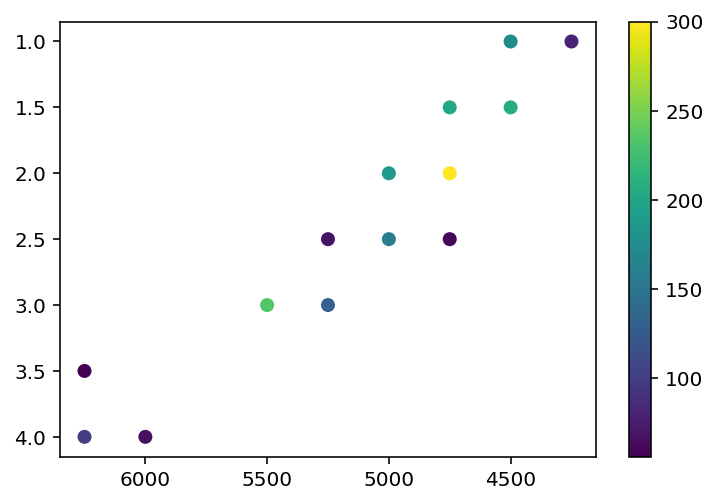

index_subgrid,counts_dr4_init,teff_subgrid,teff_low_subgrid,teff_high_subgrid,logg_subgrid,logg_low_subgrid,logg_high_subgrid,fe_h_subgrid,fe_h_low_subgrid,fe_h_high_subgrid,random_seed_subgrid,model_name
int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str15
1482,300,4750.0,4500.0,5000.0,2.0,1.5,2.5,-2.0,-2.5,-1.5,4570,4750_2.00_-2.00
1803,234,5500.0,5250.0,5750.0,3.0,2.5,3.5,-2.0,-2.5,-1.5,5330,5500_3.00_-2.00
1364,208,4500.0,4250.0,4750.0,1.5,1.0,2.0,-2.0,-2.5,-1.5,4315,4500_1.50_-2.00
1470,202,4750.0,4500.0,5000.0,1.5,1.0,2.0,-2.0,-2.5,-1.5,4565,4750_1.50_-2.00
1585,188,5000.0,4750.0,5250.0,2.0,1.5,2.5,-2.0,-2.5,-1.5,4820,5000_2.00_-2.00
1352,172,4500.0,4250.0,4750.0,1.0,0.5,1.5,-2.0,-2.5,-1.5,4310,4500_1.00_-2.00
1597,158,5000.0,4750.0,5250.0,2.5,2.0,3.0,-2.0,-2.5,-1.5,4825,5000_2.50_-2.00
1708,131,5250.0,5000.0,5500.0,3.0,2.5,3.5,-2.0,-2.5,-1.5,5080,5250_3.00_-2.00
2073,99,6250.0,6000.0,6500.0,4.0,3.5,4.5,-2.0,-2.5,-1.5,6090,6250_4.00_-2.00


In [79]:
selection = (priority['fe_h_subgrid'] <= -2) & (priority['counts_dr4_init'] > 50)
f, ax = plt.subplots()
s = ax.scatter(
    priority['teff_subgrid'][selection],
    priority['logg_subgrid'][selection],
    c = priority['counts_dr4_init'][selection],
)
plt.colorbar(s, ax=ax)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(ax.get_ylim()[::-1])
plt.show()
plt.close()

priority[selection]

In [80]:
for t in [1482]:
    test_grid_index_computations(t)

1572,
1573,
1574,
1584,
1585,
1586,
1596,
1597,
1598,


In [81]:
all_around = np.unique([
])
all_around,len(all_around)

(array([], dtype=float64), 0)

In [82]:
grids_converted_to_nn_input = [
#     1724,1725,
#     1736,1737,
    1748,1749,
    1750,1751,1752,
    1819,1820,1821,1822,1823,
    1831,1832,1833,1834,1835,
    1843,1844,1845,1846,1847,
#     1905,
    1906,1907,1908,
#     1909,
#     1917,
    1918,1919,1920,
#     1921,
#     1929,
    1930,1931,1932,
#     1933,
#     1988,
    1989,1990,1991,
#     1992,
#     2000,
    2001,2002,2003,
#     2004,
#     2012,
    2013,2014,2015,
#     2016,
#     2065,
    2066,2067,2068,
#     2069,
#     2077,
    2078,2079,2080,
#     2081,
#     2089,
    2090,2091,2092,
#     2093,
]

In [83]:
trained_6 = [
    
]

In [84]:
s = []
for grid_p in grids_done:
    if grid_p not in grids_converted_to_nn_input:
        print(str(grid_p)+',')
        s.append(grid_p)
print('import os')
print('ps = ['+','.join([str(x) for x in s])+']')
print('for p in ps:')
print("    os.system('ipython galah_dr4_grid_interpolation_trainingset_creation.py '+str(p))")

1724,
1725,
1726,
1727,
1736,
1737,
1738,
1739,
1905,
1909,
1917,
1921,
1929,
1933,
1988,
1992,
2000,
2004,
2012,
2016,
2065,
2069,
2077,
2081,
2089,
2093,
import os
ps = [1724,1725,1726,1727,1736,1737,1738,1739,1905,1909,1917,1921,1929,1933,1988,1992,2000,2004,2012,2016,2065,2069,2077,2081,2089,2093]
for p in ps:
    os.system('ipython galah_dr4_grid_interpolation_trainingset_creation.py '+str(p))


In [87]:
def get_progress():
    progress_table = Table()
    progress_table['index_subgrid'] = grids['index_subgrid']
    # Let's get placeholders for the important progress indicators: nr grids calculated, nr grids converted into training_data, training_fully finished
    progress_table['trainingset_done'] = np.zeros(len(grids['index_subgrid']),dtype=int)
    progress_table['grids_trainingset'] = np.zeros(len(grids['index_subgrid']),dtype=int)
    progress_table['grids_calculated'] = np.zeros(len(grids['index_subgrid']),dtype=int)
    progress_table['next_conversion'] = np.zeros(len(grids['index_subgrid']),dtype=int)
    progress_table['next_calculation'] = np.zeros(len(grids['index_subgrid']),dtype=int)
    # Convert all 7 grids to their gridnames
    progress_table['grid_1'] = np.array([str(int(grids['teff_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_2'] = np.array([str(int(grids['teff_low_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_3'] = np.array([str(int(grids['teff_high_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_4'] = np.array([str(int(grids['teff_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_low_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_5'] = np.array([str(int(grids['teff_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_high_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_6'] = np.array([str(int(grids['teff_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_low_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    progress_table['grid_7'] = np.array([str(int(grids['teff_subgrid'][x]))+'_'+"{:.2f}".format(grids['logg_subgrid'][x])+'_'+"{:.2f}".format(grids['fe_h_high_subgrid'][x]) for x in range(len(grids['index_subgrid']))])
    # Now let's set zeros for the progress to initiate
    progress_table['grid_1_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_2_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_3_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_4_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_5_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_6_calculated'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_7_calculated'] = np.zeros(len(grids['index_subgrid']))
    # Let's see which ones we have already put into a training set
    progress_table['grid_1_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_2_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_3_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_4_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_5_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_6_trainingset'] = np.zeros(len(grids['index_subgrid']))
    progress_table['grid_7_trainingset'] = np.zeros(len(grids['index_subgrid']))
    # Some grids cannot be calculated, let's set their value to 1 already
    # For example, we do not have grids with 5.0 logg for Teff > 4000
    progress_table['grid_5_calculated'][np.where((grids['teff_subgrid'] > 4000) & (grids['logg_high_subgrid'] > 4.75))[0]] = 1
    progress_table['grid_5_trainingset'][np.where((grids['teff_subgrid'] > 4000) & (grids['logg_high_subgrid'] > 4.75))[0]] = 1
    # Then go through the list of the ones that we actually have calculated
    for grid_done in grids_done:
        that_grid = progress_table['grid_1'][grid_done]
        try:
            progress_table['grid_1_calculated'][np.where(progress_table['grid_1'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_2_calculated'][np.where(progress_table['grid_2'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_3_calculated'][np.where(progress_table['grid_3'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_4_calculated'][np.where(progress_table['grid_4'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_5_calculated'][np.where(progress_table['grid_5'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_6_calculated'][np.where(progress_table['grid_6'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_7_calculated'][np.where(progress_table['grid_7'] == that_grid)[0][0]] = 1
        except:
            pass
    # Then go through the list of the ones that we actually have transformed into a training_data
    for grid_done in grids_converted_to_nn_input:
        that_grid = progress_table['grid_1'][grid_done]
        try:
            progress_table['grid_1_trainingset'][np.where(progress_table['grid_1'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_2_trainingset'][np.where(progress_table['grid_2'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_3_trainingset'][np.where(progress_table['grid_3'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_4_trainingset'][np.where(progress_table['grid_4'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_5_trainingset'][np.where(progress_table['grid_5'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_6_trainingset'][np.where(progress_table['grid_6'] == that_grid)[0][0]] = 1
        except:
            pass
        try:
            progress_table['grid_7_trainingset'][np.where(progress_table['grid_7'] == that_grid)[0][0]] = 1
        except:
            pass
    progress_table['grids_calculated'] = np.sum(progress_table['grid_'+str(n)+'_calculated'] for n in [1,2,3,4,5,6,7])
    progress_table['grids_trainingset'] = np.sum(progress_table['grid_'+str(n)+'_trainingset'] for n in [1,2,3,4,5,6,7])
    for index in trained_6:
        progress_table['trainingset_done'][index] = 1
    for index in range(len(progress_table['grids_trainingset'])):
        if progress_table['grids_calculated'][index] == 6:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid
        if progress_table['grids_calculated'][index] == 5:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid
        if progress_table['grids_calculated'][index] == 4:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid
        if progress_table['grids_calculated'][index] == 3:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid
        if progress_table['grids_calculated'][index] == 2:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid
        if progress_table['grids_calculated'][index] == 1:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_calculated'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_calculation'][index] = index_missing_grid

    for index in range(len(progress_table['grids_trainingset'])):
        if progress_table['grids_trainingset'][index] == 6:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_trainingset'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_conversion'][index] = index_missing_grid
        if progress_table['grids_trainingset'][index] == 5:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_trainingset'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_conversion'][index] = index_missing_grid
        if progress_table['grids_trainingset'][index] == 4:
            missing_grid = np.where(np.array([progress_table['grid_'+str(n)+'_trainingset'][index] for n in [1,2,3,4,5,6,7]])==0)[0][0]
            index_missing_grid = np.where(progress_table['grid_1'] == progress_table['grid_'+str(missing_grid+1)][index])[0]
            if len(index_missing_grid) > 0:
                index_missing_grid = index_missing_grid[0]
            else:
                index_missing_grid = -1
            progress_table['next_conversion'][index] = index_missing_grid

    return(progress_table)
progress_table = get_progress()
x=90
progress_table[np.where((progress_table['grids_calculated'] >= 6) & (progress_table['trainingset_done'] != 1))[0]][x:15+x]

<ipython-input-87-86d08855f138>:100: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  progress_table['grids_calculated'] = np.sum(progress_table['grid_'+str(n)+'_calculated'] for n in [1,2,3,4,5,6,7])
<ipython-input-87-86d08855f138>:101: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  progress_table['grids_trainingset'] = np.sum(progress_table['grid_'+str(n)+'_trainingset'] for n in [1,2,3,4,5,6,7])


index_subgrid,trainingset_done,grids_trainingset,grids_calculated,next_conversion,next_calculation,grid_1,grid_2,grid_3,grid_4,grid_5,grid_6,grid_7,grid_1_calculated,grid_2_calculated,grid_3_calculated,grid_4_calculated,grid_5_calculated,grid_6_calculated,grid_7_calculated,grid_1_trainingset,grid_2_trainingset,grid_3_trainingset,grid_4_trainingset,grid_5_trainingset,grid_6_trainingset,grid_7_trainingset
int64,int64,float64,float64,int64,int64,str15,str15,str15,str16,str15,str15,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64


In [88]:
print(len(np.unique(list(progress_table['next_calculation'][np.where((progress_table['grids_calculated'] >= 6) & (progress_table['trainingset_done'] != 1))[0]]))))
np.unique(list(progress_table['next_calculation'][np.where((progress_table['grids_calculated'] >= 6) & (progress_table['trainingset_done'] != 1))[0]]))

32


array([   0, 1638, 1639, 1650, 1651, 1652, 1808, 1809, 1810, 1830, 1842,
       1848, 1894, 1895, 1896, 1916, 1922, 1928, 1934, 1977, 1978, 1979,
       1999, 2005, 2011, 2017, 2151, 2152, 2153, 2163, 2164, 2165])

In [89]:
progress_table[np.where((progress_table['grids_calculated'] == 7) & (progress_table['trainingset_done'] != 1))[0]]

index_subgrid,trainingset_done,grids_trainingset,grids_calculated,next_conversion,next_calculation,grid_1,grid_2,grid_3,grid_4,grid_5,grid_6,grid_7,grid_1_calculated,grid_2_calculated,grid_3_calculated,grid_4_calculated,grid_5_calculated,grid_6_calculated,grid_7_calculated,grid_1_trainingset,grid_2_trainingset,grid_3_trainingset,grid_4_trainingset,grid_5_trainingset,grid_6_trainingset,grid_7_trainingset
int64,int64,float64,float64,int64,int64,str15,str15,str15,str16,str15,str15,str15,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1832,0,6.0,7.0,1737,0,5500_4.00_-0.25,5250_4.00_-0.25,5750_4.00_-0.25,5500_3.50_-0.25,5500_4.50_-0.25,5500_4.00_-0.50,5500_4.00_0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1833,0,6.0,7.0,1738,0,5500_4.00_0.00,5250_4.00_0.00,5750_4.00_0.00,5500_3.50_0.00,5500_4.50_0.00,5500_4.00_-0.25,5500_4.00_0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1834,0,6.0,7.0,1739,0,5500_4.00_0.25,5250_4.00_0.25,5750_4.00_0.25,5500_3.50_0.25,5500_4.50_0.25,5500_4.00_0.00,5500_4.00_0.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1844,0,7.0,7.0,0,0,5500_4.50_-0.25,5250_4.50_-0.25,5750_4.50_-0.25,5500_4.00_-0.25,5500_5.00_-0.25,5500_4.50_-0.50,5500_4.50_0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1845,0,7.0,7.0,0,0,5500_4.50_0.00,5250_4.50_0.00,5750_4.50_0.00,5500_4.00_0.00,5500_5.00_0.00,5500_4.50_-0.25,5500_4.50_0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1846,0,7.0,7.0,0,0,5500_4.50_0.25,5250_4.50_0.25,5750_4.50_0.25,5500_4.00_0.25,5500_5.00_0.25,5500_4.50_0.00,5500_4.50_0.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1918,0,6.0,7.0,1917,0,5750_4.00_-0.25,5500_4.00_-0.25,6000_4.00_-0.25,5750_3.50_-0.25,5750_4.50_-0.25,5750_4.00_-0.50,5750_4.00_0.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1919,0,7.0,7.0,0,0,5750_4.00_0.00,5500_4.00_0.00,6000_4.00_0.00,5750_3.50_0.00,5750_4.50_0.00,5750_4.00_-0.25,5750_4.00_0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1920,0,6.0,7.0,1921,0,5750_4.00_0.25,5500_4.00_0.25,6000_4.00_0.25,5750_3.50_0.25,5750_4.50_0.25,5750_4.00_0.00,5750_4.00_0.50,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [90]:
todo = [str(x) for x in progress_table['index_subgrid'][np.where(((progress_table['next_conversion'] == -1) | (progress_table['next_conversion'] == 0)) & (progress_table['grids_calculated'] == 7) & (progress_table['trainingset_done'] != 1))[0]]]
todo1 = todo[:int(len(todo)/2)]
todo2 = todo[int(len(todo)/2):]

print(','.join(todo))
for t in [todo1,todo2]:
    print('import os')
    print('ps = ['+','.join(t)+']')
    print('for p in ps:')
    print("    os.system('ipython galah_dr4_thepayne_grid_interpolation_training_extra6.py '+str(p))")


1844,1845,1846,1919,1931,2002,2014
import os
ps = [1844,1845,1846]
for p in ps:
    os.system('ipython galah_dr4_thepayne_grid_interpolation_training_extra6.py '+str(p))
import os
ps = [1919,1931,2002,2014]
for p in ps:
    os.system('ipython galah_dr4_thepayne_grid_interpolation_training_extra6.py '+str(p))


In [92]:
upcoming_priority = priority[[x not in trained_6 for x in priority['index_subgrid']]]
upcoming_priority[0]

index_subgrid,counts_dr4_init,teff_subgrid,teff_low_subgrid,teff_high_subgrid,logg_subgrid,logg_low_subgrid,logg_high_subgrid,fe_h_subgrid,fe_h_low_subgrid,fe_h_high_subgrid,random_seed_subgrid,model_name
int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,str15
2002,35637,6000.0,5750.0,6250.0,4.0,3.5,4.5,0.0,-0.25,0.25,6040,6000_4.00_0.00


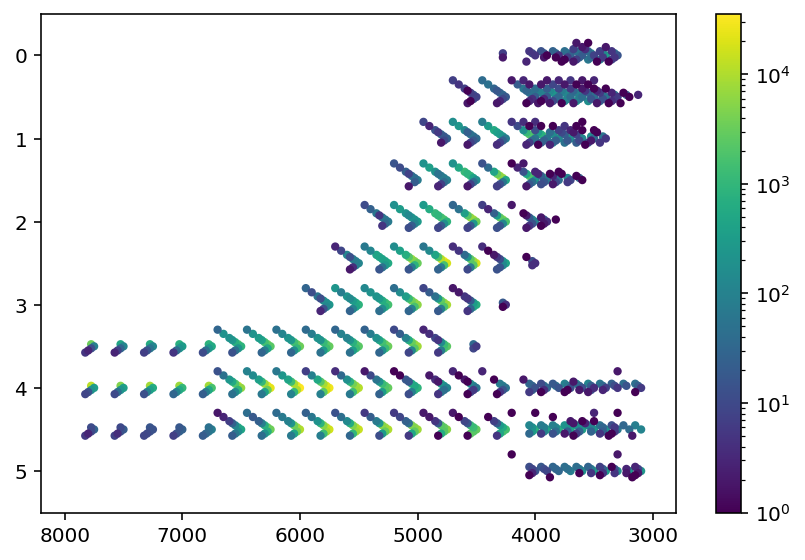

In [97]:
selection = (priority['counts_dr4_init'] > 50)

f, ax = plt.subplots()
s = ax.scatter(
    priority['teff_subgrid'][selection] + np.abs(100*priority['fe_h_subgrid'][selection]),
    priority['logg_subgrid'][selection] + 0.1*priority['fe_h_subgrid'][selection],
    c = priority['counts_dr4_init'][selection],
    s = 10,
    norm=LogNorm()
)
ax.set_xlim(8200,2800)
ax.set_ylim(5.5,-0.5)
plt.colorbar(s, ax=ax)
plt.tight_layout()
plt.show()
plt.close()
priority[selection]